In [1]:
#https://github.com/woctezuma/download-steam-reviews   
#refer the coding here

import steamreviews


In [184]:
#testing to see information
#329070 spy party is able to get all, meanwhile
#960090 bloons td cant

#if info does not come out, delete the idprocessed file
steamreviews.download_reviews_for_app_id_batch()

Loading idlist.txt
Loading idprocessed_on_20221219.txt
[appID = 281990] expected #reviews = 140240


KeyboardInterrupt: 

In [2]:
#SCRAPE THROUGH API
#source : https://stackoverflow.com/questions/71415099/cant-download-the-whole-set-of-reviews-from-steam
from datetime import date

d0 = date(2020,1,1) #start date to collect data
d1 = date.today()
delta = d1 - d0

print(delta.days)
print(type(delta.days))

import requests

def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()
    
def get_n_reviews(appid, n):
    reviews = []
    cursor = '*'
    params = {
            'json' : 1,
            'filter' : 'recent',
            #'day_range' : 9223372036854775807, #download from day 0, number of days ago meaning i need to determine how many days ago to 1st Jan 2021
            'day_range' : delta.days, #collect data from 1/1/2020
            'review_type' : 'all',
            'language' : 'english',
            'purchase_type' : 'all'
            }

    while n > 0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = 100
        n -= 100

        response = get_reviews(str(appid), params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

1089
<class 'int'>


In [12]:
#EDIT AND USE THIS CODE TO COLLECT DATA FROM 1/1/2020 and 31/12/2020 AND BEFORE INSERTING TO EXCEL
#this code does not have a json file, but uses a dictionary format <- need to be updated in report
#https://www.youtube.com/watch?v=zE2fgO3ue00
# https://www.youtube.com/watch?v=aFpJo6HKnyU&t=2s

#Function : Get the reviews 

def getReview(appID,numReview,gameName):
    json_data  = get_n_reviews(appID,numReview)

    import xlwt
    from xlwt import Workbook

    wb = Workbook()

    sheet1 = wb.add_sheet('Sheet 1')

    sheet1.write(0,0,"review")
    sheet1.write(0,1,"sentiment")
    sheet1.write(0,2,"score")
    sheet1.write(0,3,"time")

    row = 0
    countReview = 0
    #GET RAW DATA , INSERT , AND SAVE TO EXCEL FILE SIMULTANEOUSLY
    for record in json_data:
        if record["timestamp_created"] >= 1577840461 and record["timestamp_created"] <= 1609419599 : #timestamp between 1/1/2020 and 31/12/2020
                row += 1
                sheet1.write(row,0,record["review"])
                sheet1.write(row,1,record["voted_up"])
                sheet1.write(row,2,record["weighted_vote_score"])
                sheet1.write(row,3,record["timestamp_created"])
                countReview += 1
                
    print("Number of reviews" , gameName , "obtained:" , countReview)

    saveFile = gameName + ".xlsx"
    wb.save(saveFile)

    return countReview


In [11]:
#Game information
appID = 281990
numReview = 140240#get this value from steamreview function

In [7]:
gameName = "Stellaris"

In [15]:
#Run this one at a time
reviewObtained = getReview(appID,numReview,gameName)

KeyboardInterrupt: 

In [4]:
#download nltk libraries, only use if needed
import nltk
nltk.download('omw-1.4')

nltk.download('punkt') #to download tokenize
nltk.download('averaged_perceptron_tagger')# to download POS
nltk.download('wordnet')# to allow lemmatization

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import re

import math
import contractions
#ALGORITHM TO PREPROCESS AND MOVE REVIEW INTO EXCEL FILE, this file will only be used for training and testing

#---------------------- PREPROCESSING LIBRARIES ------------
import re

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,sent_tokenize #for pos tagging
from nltk.stem import WordNetLemmatizer #for lemmatizing

#intsall NLTK
#nltk.download() #to download nltk
#nltk.download('punkt') #to download tokenize
#nltk.download('averaged_perceptron_tagger')# to download POS
#nltk.download('wordnet')# to allow lemmatization

import contractions

import xlwt
from xlwt import Workbook

#------------------IMPORT DATA FROM EXCEL---------------------------   
#https://www.geeksforgeeks.org/how-to-iterate-through-excel-rows-in-python/
import openpyxl
from sqlalchemy import null

    #*********LOCATION OF REVIEW, EG BLOONSTD ----------------------
    # load excel location

In [21]:
def preprocess(rawFile):
    Corpus = pd.read_excel(rawFile + ".xlsx")
    # iterate through excel 

    #for saving into excel
    wb = Workbook()
    sheet1 = wb.add_sheet('Sheet 1')

    i = 0
    sheet1.write(0,0,"review")
    sheet1.write(0,1,"sentiment")
    sheet1.write(0,2,"score")
    sheet1.write(0,3,"time")
    #-------------------------------------------------

    # Step - a : Remove blank rows if any.
    Corpus['review'] = Corpus.dropna()
                    #6.1 before tokenize, contract the words first

    Corpus['review'] = [re.sub(r'https?://\S+', '', str(entry)) for entry in Corpus['review']]

    #2.remove HTML tags (THIS WILL REMOVE ALL INCLUDING CHECKBOX, but review with type checkboxes are rare, so removing them will not affect classifier as much)
    
    Corpus['review'] = [contractions.fix(entry) for entry in Corpus['review'] ] 
    
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
                    
    Corpus['review'] = [re.sub(CLEANR, '',entry) for entry in Corpus['review']]
                    
    #3.remove emoji?
    
    Corpus['review'] = [re.sub(r'[\🔳\🔲\☐][^\☑️\✅\☑]*', '', entry) for entry in Corpus['review'] if  "🔲" or "🔳" or "☐" or "☑" or "✅" or "☑️" in entry]

                    #https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
                    #before removing all emoji, check which checkbox will not be useful and remove them
                    
        #http://www.unicode.org/Public/emoji/1.0//emoji-data.txt
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags=re.UNICODE)



    Corpus['review'] = [emoji_pattern.sub(r'', entry) for entry in Corpus['review']]  # no emoji

                    #remove symbols (unimportant ones such as related to emojis) - will be done after breaking each sentence. Reger 8.1
    #def checkEmoji(word):
    #   if  "🔲" or "🔳" or "☐" or "☑" or "✅" or "☑️" in word:    
    #      return re.sub(r'[\🔳\🔲\☐][^\☑️\✅\☑]*', '', word) #DO NOT TOUCH THIS

                    #4. set to lowercase
    Corpus['review'] = [entry.lower() for entry in Corpus['review']]
                    #5. remove number
    Corpus['review'] = [''.join([i for i in entry if not i.isdigit()]) for entry in Corpus['review']]

                    #6. remove extra whitespace
    Corpus['review'] = [" ".join(entry.split()) for entry in Corpus['review']] 
                # print(review)

    # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
    Corpus['review']= [word_tokenize(entry) for entry in Corpus['review']]


    # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
    # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    Corpus['score'] = [0.1 if entry==0 else entry for entry in Corpus['score']]
#stopwords.update(["br", "href","good","great"])
    
    stop_words = set(stopwords.words('english')) - set(['not', 'no']) #omit no and not

    #add words that aren't in the NLTK stopwords list
    new_stopwords = ['game' ,'play','civ','stellaris','make','colony']
    stop_words = stop_words.union(new_stopwords)

    for index,entry in enumerate(Corpus['review']):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            word = re.sub(r'[^A-Za-z0-9 ]+', '', word)
            if word not in stop_words and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)

        # The final processed set of words for each iteration will be stored in 'text_final'
        review = str(" ".join(Final_words))
        sentiment = Corpus['sentiment'][index]
        score = Corpus['score'][index]
        time = Corpus['time'][index]

        if review == "nan":
            review = ""

        if len(review) != 0 and len(review) >= 6:
            sheet1.write(i+1,0,review)
            sheet1.write(i+1,1,bool(sentiment))
            sheet1.write(i+1,2,score)
            sheet1.write(i+1,3,int(time))
            i += 1
    

    print(i)
    wb.save("Preprocessed" + rawFile +"v4.xls")        

In [22]:
#gamename can also refer my experimental files
#still preprocess all reviews because we will still use them
#use ExperimentSent for testing purposes
preprocess("BloonsTD")

18413


<t>SELECT ROWS FOR EACH GAME TO BE MERGED</t>

In [5]:
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import xlwt
from xlwt import Workbook

#reviewWant, eg 3000 per game.
def selectReview(reviewWant):

    wb = Workbook()

    df = pd.ExcelFile("Preprocessed"+gameName+"v3.xls").parse()
    #xls = pd.ExcelFile("Preprocessed"+gameName+".xls")
    #df.info()
    sns.countplot(df['sentiment'])
    
    sheet1 = wb.add_sheet('Sheet 1')
    #writing = xls.parse(0)
    #Transform true = 1, false = 0
    le = LabelEncoder()
    df['sentiment'] = le.fit_transform(df['sentiment'])

    sentVal = Counter(df['sentiment'])
   # sentVal = Counter(xls['sentiment'])
    sent = sentVal.most_common()
    numTrue = sent[0][1] #get number of true sentiment
    numFalse = sent[1][1] #get number of false sentiment
    

    #number of true review to be collected. only collect when numFalse is completely collected.
    numTrue = reviewWant - numFalse

    tr = 0
    fl = 0
    excelRow = 0

    sheet1.write(0, 0, "review")
    sheet1.write(0, 1, "sentiment")

    for i in range(len(df)): 
        
        review = (df['review'][i]) #col  1 to get review
        sentiment = (df['sentiment'][i]) #col  1 to get review

       # review = writing['review'][i] 
       #  sentiment = writing['sentiment'][i] 
        
        if sentiment == 0 and fl < numFalse:
            if fl <= numFalse:
                fl += 1
                sheet1.write(excelRow+1, 0, str(review))
                sheet1.write(excelRow+1, 1, str(sentiment))
                excelRow += 1

        elif sentiment == 1:
            if tr < numTrue:
                tr += 1
                sheet1.write(excelRow+1, 0, str(review))
                sheet1.write(excelRow+1, 1, str(sentiment))
                excelRow += 1


    wb.save("selected" + gameName + "v3.xls")  

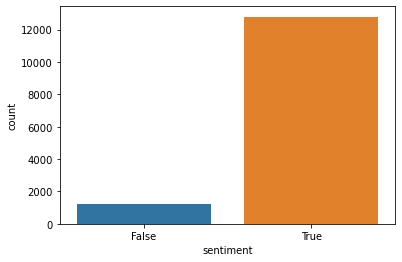

In [287]:
gameName = "Stellaris"
reviewWant = 3000 #our choice
selectReview(reviewWant)

In [21]:
gameName="Stellaris"

2698
9302


d:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


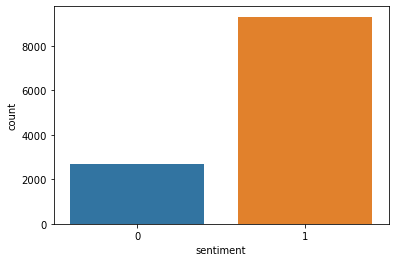

In [23]:
wb = Workbook()

#df = pd.ExcelFile("Preprocessed"+gameName+"v3.xls").parse()
#df = pd.ExcelFile(gameName+".xlsx").parse()
#df = pd.ExcelFile("selected"+gameName+".xls").parse()
df = pd.ExcelFile("mergedv3.xls").parse()
    #xls = pd.ExcelFile("Preprocessed"+gameName+".xls")
    #df.info()
sns.countplot(df['sentiment'])
    
sheet1 = wb.add_sheet('Sheet 1')
    #writing = xls.parse(0)
    #Transform true = 1, false = 0
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

sentVal = Counter(df['sentiment'])
   # sentVal = Counter(xls['sentiment'])
sent = sentVal.most_common()
numTrue = sent[0][1] #get number of true sentiment
numFalse = sent[1][1] #get number of false sentiment

print(numFalse)
print(numTrue)

<t>MERGING REVIEWS FOR TRAINING</t>

In [69]:
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import xlwt
from xlwt import Workbook



def mergeReview(doc1,doc2,doc3,doc4):
    
    wb = Workbook()
    
    sheet1 = wb.add_sheet('Sheet 1')
    sheet1.write(0, 0, "review")
    sheet1.write(0, 1, "sentiment")

    excelRow = 0
    doc = 0

    while doc < 4:
        
        if doc == 0:
            df = pd.ExcelFile(doc1).parse()
        elif doc == 1:
            df = pd.ExcelFile(doc2).parse()
        elif doc == 2:
            df = pd.ExcelFile(doc3).parse()
        else:
            df = pd.ExcelFile(doc4).parse()

        for i in range(len(df)): 

    #-----------GET REVIEW ------------

            review = (df['review'][i]) #col  1 to get review
            sentiment = (df['sentiment'][i]) #col  1 to get review

            sheet1.write(excelRow+1, 0, str(review))
            sheet1.write(excelRow+1, 1, str(sentiment))
            excelRow += 1

        doc += 1
    
    #name of merged file
    wb.save("mergedv3.xls")  

In [288]:
#insert all preprocessed game name here,i.e PreprocessedBloondTD.xls
mergeReview("selectedBloonsTDv3.xls","selectedONIv3.xls","selectedSMCv3.xls","selectedStellarisv3.xls")

In [68]:
#will only be used in training
#can still rename it to preprocessed file of any game. i.e PreprocessedBloondTD.xls
mergedFile = "merged.xls"

Number reviews: 12000
Number of false sentiment: 2698
Number of ture sentiment: 9302


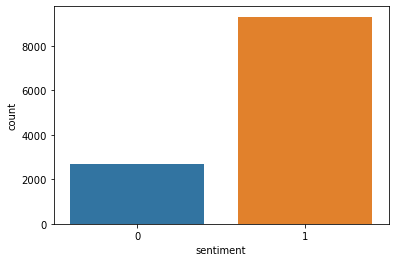

In [292]:
dfMerge = pd.ExcelFile("mergedv3.xls").parse()
#xls = pd.ExcelFile("Preprocessed"+gameName+".xls")
    #df.info()
sns.countplot(dfMerge['sentiment'])

sentVal = Counter(dfMerge['sentiment'])
# sentVal = Counter(xls['sentiment'])
sent = sentVal.most_common()
numTrue = sent[0][1] #get number of true sentiment
numFalse = sent[1][1] #get number of false sentiment

print("Number reviews:" , numFalse+numTrue)
print("Number of false sentiment:", numFalse)
print("Number of ture sentiment:", numTrue)

<t>BEGIN TRAINING AND MODELING - ALGORITHM TO TAKE PROCESSED SENTIMENT AND DETERMINE THEIR POLARITY (AND MODELLING)</t>
<t>Seperated into 4 parts</t>
<l>
1. Append all reviews for tf-idf
2. Conduct tf-idf
3. Train svm
4. Fit svm
</l>

In [22]:
import pickle
import os
import string
import warnings

import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,RandomizedSearchCV, KFold

from scipy import stats
from collections import Counter

warnings.filterwarnings('ignore')

In [28]:
def readFile(fileName):
    df = pd.read_excel(fileName)
    X = df['review']
    Y = df['sentiment']

    return X,Y

In [29]:
#STEP 2: SPLIT TRAIN SVM

def training(fileName):
    #train test split
    #x = word, y = sentiment
    X,Y = readFile(fileName)

    #test size = 0.2, meaning 80:20 split
    word_train, word_test, sentiment_train, sentiment_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True, stratify=Y)
    # Check the number of records in training and testing dataset.
    #print("The training dataset has" ,  len(word_train) , " records.")
    #print("The testing dataset has" , len(word_test) , " records.")

    return word_train, word_test, sentiment_train, sentiment_test

In [30]:
#DEFAULT TF-IDF AND CLASSIFIER , AFTER CROSS VALIDATION of tuned vs default, only then tuned tfidf

#USING SPLIT TRAIN TEST
#STEP 3: TF-IDF

def vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test):

    X,Y = readFile(fileName)

    
    word_train_vec = vect.transform(word_train)
    sentiment_train_vec = np.array(sentiment_train)

    word_test_vec = vect.transform(word_test)
    sentiment_test_vec = np.array(sentiment_test)

    vecWord = vect.transform(X)
    vecSentiment = np.array(Y)

    print("n_samples:" , len(word_train) , "n_features:" , len(vect.get_feature_names()))
    
    return word_train_vec, sentiment_train_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment

In [31]:
#PART 4: FIT INTO CLASSIFIER
#modelling
# kernel, gamma, etc : https://www.youtube.com/watch?v=7szWpkUIIs
# learning rate, lambda : https://www.youtube.com/watch?v=5egiXYde6PY

def classifier(word_train, sentiment_train, model):
    
    model.fit(word_train, sentiment_train)

<t>FEATURES FOR EACH PREPROCESSED DATA</t>
<p>Why do we do this? Because need to be the same, otherwise, it cannot predict new files with different number of features</p>
<ul>Merged: 148507</ul>
<ul>BloonsTD: 108911</ul>
<ul>Oxygen Not Included: 90971</ul>
<ul>SMC: 78374</ul>
<ul>Stellaris: 197697</ul>

<p>Therefore, the values need to be max 78374</p>

<p style="color:red;"> No need to worry about this anymore because tfidf will not be used multiple times, only once when training </p>

In [33]:
def displayResult(wordCount,sentimentValues,y_test,X_train,X_test,y_train, modelFit):
    
    print(Counter(y_train))
    print(sns.countplot(y_train))

    X = wordCount
    Y = sentimentValues
    

    kfold = KFold(shuffle=True, n_splits=10)
    cv_score = cross_val_score(modelFit,X,Y, cv = kfold)
    meanAccuracy = round((sum(cv_score/len(cv_score)))*100,2)
    
    print("Mean Accuracy:" , meanAccuracy)
    
    word_Testprediction = modelFit.predict(X_test)
    print(classification_report(y_test, word_Testprediction))
    print("-----------------")

    diff = cv_score.mean() - modelFit.score(X_test, y_test)
    SD = diff / cv_score.std()
    
    print(f"Training Score:{modelFit.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_score.mean()} +/- {cv_score.std()}")
    print(f"Testing Score: {modelFit.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, word_Testprediction ))

In [7]:
fileName = "mergedv3.xls"

<t> CALL MODULE TO TRAIN WITHOUT SMOTE </t>

<t> LINEAR KERNEL </t>

n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 2158})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 89.72
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       540
           1       0.91      0.95      0.93      1860

    accuracy                           0.89      2400
   macro avg       0.86      0.82      0.84      2400
weighted avg       0.89      0.89      0.89      2400

-----------------
Training Score:0.9541666666666667
Cross V Score: 0.8971666666666666 +/- 0.008442616761275959
Testing Score: 0.8925
Cross & Test Diff: 0.004666666666666597
Standard Deviations Away: 0.5527512143002105
[[ 370  170]
 [  88 1772]]


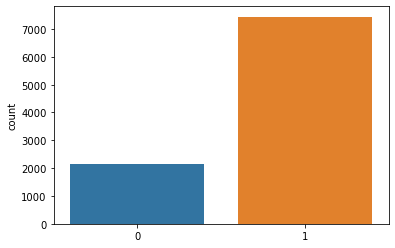

In [10]:
#https://www.youtube.com/watch?v=TMzaK2-K5C4&list=TLPQMzExMjIwMjJdYi-jcUwHRQ&index=11
#Step 1 : Split train test
word_train, word_test, sentiment_train, sentiment_test = training(fileName)

#Step 2 : Tf-idf
vect = TfidfVectorizer().fit(word_train)
word_train_vec, sentiment_train_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test)

#Step 3: Fit into classifier
defModel = svm.SVC(kernel='linear', random_state=0)
classifier(word_train_vec, sentiment_train_vec,defModel)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_train_vec,word_test_vec,sentiment_train_vec,defModel)
#HOW TO USE THE MODEL? , just use classifier.preditct(vect.transform(df['sentiment']))

<t> POLY KERNEL </t>

n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 2158})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 81.1
              precision    recall  f1-score   support

           0       0.85      0.18      0.30       540
           1       0.81      0.99      0.89      1860

    accuracy                           0.81      2400
   macro avg       0.83      0.59      0.59      2400
weighted avg       0.82      0.81      0.76      2400

-----------------
Training Score:0.9958333333333333
Cross V Score: 0.8110000000000002 +/- 0.011994211566881357
Testing Score: 0.8083333333333333
Cross & Test Diff: 0.002666666666666817
Standard Deviations Away: 0.22232946715981458
[[  97  443]
 [  17 1843]]


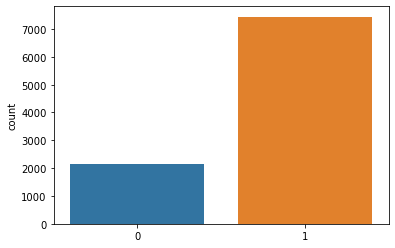

In [11]:
#https://www.youtube.com/watch?v=TMzaK2-K5C4&list=TLPQMzExMjIwMjJdYi-jcUwHRQ&index=11
#Step 1 : Split train test
word_train, word_test, sentiment_train, sentiment_test = training(fileName)

#Step 2 : Tf-idf
vect = TfidfVectorizer().fit(word_train)
word_train_vec, sentiment_train_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test)

#Step 3: Fit into classifier
defModel = svm.SVC(kernel='poly', random_state=0)
classifier(word_train_vec, sentiment_train_vec,defModel)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_train_vec,word_test_vec,sentiment_train_vec,defModel)
#HOW TO USE THE MODEL? , just use classifier.preditct(vect.transform(df['sentiment']))

<t> RBF KERNEL </t>

n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 2158})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 89.7
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       540
           1       0.91      0.97      0.93      1860

    accuracy                           0.90      2400
   macro avg       0.88      0.81      0.84      2400
weighted avg       0.89      0.90      0.89      2400

-----------------
Training Score:0.9820833333333333
Cross V Score: 0.8969999999999999 +/- 0.004444097208657778
Testing Score: 0.8954166666666666
Cross & Test Diff: 0.00158333333333327
Standard Deviations Away: 0.356277835293228
[[ 353  187]
 [  64 1796]]


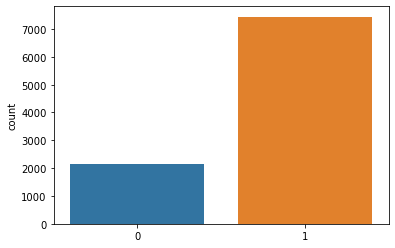

In [12]:
#https://www.youtube.com/watch?v=TMzaK2-K5C4&list=TLPQMzExMjIwMjJdYi-jcUwHRQ&index=11
#Step 1 : Split train test
word_train, word_test, sentiment_train, sentiment_test = training(fileName)

#Step 2 : Tf-idf
vect = TfidfVectorizer().fit(word_train)
word_train_vec, sentiment_train_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test)

#Step 3: Fit into classifier
defModel = svm.SVC(kernel='rbf', random_state=0)
classifier(word_train_vec, sentiment_train_vec,defModel)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_train_vec,word_test_vec,sentiment_train_vec,defModel)
#HOW TO USE THE MODEL? , just use classifier.preditct(vect.transform(df['sentiment']))

<t>SMOTE TRANING MODULE</t>

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE
#https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
#https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688

#https://stackoverflow.com/questions/50999596/smote-oversampling-on-text-classification-in-python

from imblearn.pipeline import Pipeline, make_pipeline

def trainingSmote(fileName):
    #SMOTE IS USED AFTER TF-IDF

    #-------------------smote--------------------
    #HOW TO USE THE MODEL? , just use classifier.preditct(wordList)

    #https://towardsdatascience.com/how-to-handle-smote-data-in-imbalanced-classification-problems-cf4b86e8c6a1
    smt =  SMOTE(random_state=0)

    #ONLY ON training data, not test data.
    word_train, word_test, sentiment_train, sentiment_test = training(fileName)
    
    #Temporary only
    vect = TfidfVectorizer(ngram_range=(1,1) , max_df = 0.5, max_features=15000).fit(word_train)
    #vect = TfidfVectorizer().fit(word_train)

    word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test)

    word_Smote_vec , sentiment_Smote_vec = smt.fit_resample(word_Smote_vec, sentiment_Smote_vec)

    return word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment


<t>CALL MODULE AND TRAIN WITH SMOTE</t>

In [7]:
fileName = "mergedv3.xls"

n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 7442})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 81.06
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       540
           1       0.89      0.96      0.92      1860

    accuracy                           0.87      2400
   macro avg       0.84      0.78      0.80      2400
weighted avg       0.87      0.87      0.87      2400

-----------------
Training Score:0.9967078742273583
Cross V Score: 0.8105833333333333 +/- 0.010274361294017246
Testing Score: 0.8745833333333334
Cross & Test Diff: -0.06400000000000006
Standard Deviations Away: -6.229097670262697
[[ 321  219]
 [  82 1778]]


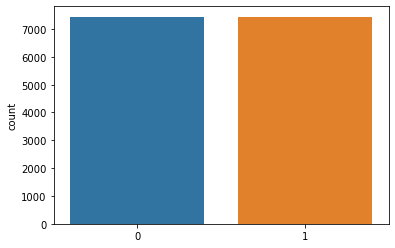

In [28]:
smoteModel = svm.SVC(kernel='poly', random_state=0)

#Step 1 : Split train test AND
#Step 2 : Tf-idf FOR SMOTE CASE

word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = trainingSmote(fileName)

#Step 3: Fit into classifier
classifier(word_Smote_vec, sentiment_Smote_vec,smoteModel)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_Smote_vec,word_test_vec,sentiment_Smote_vec,smoteModel)
#HOW TO USE THE MODEL? , just use classifier.preditct(wordList)


<t>TUNING PART OF MODELING</t>

In [44]:
from hyperopt import tpe
from hyperopt import STATUS_OK
from hyperopt import Trials
from hyperopt import hp
from hyperopt import fmin

In [45]:
word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = trainingSmote(fileName)

n_samples: 9600 n_features: 12880


In [46]:
def objective(params, X_train = word_Smote_vec, y_train = sentiment_Smote_vec):

    clf = svm.SVC(**params,random_state=0, kernel = 'linear')

   # kfold = KFold(shuffle=True, n_splits=5)
   
    #scores = cross_val_score(clf, X_train, y_train, cv=5) #scoring='f1_macro'
    kfold = StratifiedKFold(n_splits=5)
    scores = cross_val_score(clf, X_train, y_train, cv=kfold)

    # Extract the best score
    best_score = max(scores)

    # Loss must be minimized
    loss = 1 - best_score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

<t>SVM HYPERPARAMETER</t>
<p>
C &nbsp                        1.0  <br>
break_ties    &nbsp             False <br>
cache_size      &nbsp             200 <br>
class_weight      &nbsp          None <br>
coef0            &nbsp            0.0 <br>
decision_function_shape   &nbsp   ovr <br>
degree        &nbsp                 3 <br>
gamma        &nbsp              scale <br>
kernel          &nbsp          linear <br>
max_iter           &nbsp           -1 <br>
probability       &nbsp         False <br>
random_state     &nbsp           None <br>
shrinking      &nbsp             True <br>
tol            &nbsp            0.001 <br>
verbose           &nbsp         False <br>
</p>

In [ ]:
polynomial kernel or RBF kernel


In [47]:
#set hyperparameter ranges
param_grid = {
  # 'class_weight': hp.choice
   'C' : hp.qloguniform('C', np.log(0.001), np.log(10**5), 0.001),
  # 'gamma' : hp.qloguniform('gamma', np.log(0.0001), np.log(10**3), 0.0001)
}

MAX_EVALS = 10

In [48]:
# only run once in a while
#https://github.com/udaykondreddy/Code-for-learn-machinelearning/tree/master/hyperparameter%20tuning
#-------------------------------------------------------------------------
tpe_algorithm = tpe.suggest

bayes_trials = Trials()
#params, n_folds, X_train, Y_train
best = fmin(fn = objective, space = param_grid, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)


100%|██████████| 10/10 [4:24:52<00:00, 1589.22s/trial, best loss: 0.04669129996640908] 


In [49]:
#print best values
best

{'C': 15.576}

<t>USING HYPEROPT </t>
<p>Hyperparameter tuned + SMOTE: {'C': 1.611385743402565, 'gamma': 0.1377145454497124}</p> 
<p>Hyperparameter tuned + SMOTE, latest version: {'C': 1.1055133591670183, 'gamma': 19.240787455089944}</p> 
<p>Hyperparameter tuned + SMOTE, latest version 2: {'C': 4.939758581723716, 'gamma': 108.6409752192577}</p> 
<p>Hyperparameter tuned + SMOTE, latest version 3: {'C': 8.219, 'gamma': 0.13440000000000002}</p> 
{'C': 11.327}


<t>USING RANDOMIZED SEARCH </t>
<p>Hyperparameter tuned + Default: svm.SVC(kernel='linear', gamma= 10000000.0, C = 10.0) </p>

<p> Try to use and compare parameter of trained with smote vs trained with default in the random selecter </p>

---HYPERPARAMETER TUNED---
n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 7442})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 88.02
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       540
           1       0.92      0.91      0.91      1860

    accuracy                           0.87      2400
   macro avg       0.81      0.82      0.81      2400
weighted avg       0.87      0.87      0.87      2400

-----------------
Training Score:0.9883767804353668
Cross V Score: 0.88025 +/- 0.008660654966250809
Testing Score: 0.8675
Cross & Test Diff: 0.012749999999999928
Standard Deviations Away: 1.4721750317596816
[[ 389  151]
 [ 167 1693]]


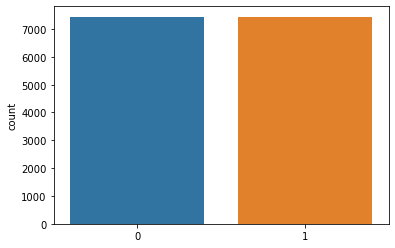

In [50]:
#-----------------------------------------
print("---HYPERPARAMETER TUNED---")
#JUST USE THIS AND INSERT BEST VALUE, no need to run hyperopt everytime
# first time, the hyperparameter tuned is better.

#HYPER PARAMETER TUNED, be sure to insert the values after finding best parameter
classifierTuned = svm.SVC(kernel='linear', C= 15.576,random_state=0)

#Step 1 : Split train test
#Step 2 : Tf-idf
word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = trainingSmote(fileName)

#Step 3: Fit into classifier
classifier(word_Smote_vec, sentiment_Smote_vec,classifierTuned)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_Smote_vec,word_test_vec,sentiment_Smote_vec,classifierTuned)

#why find both accuracy (training and testing) ? to avoid overfit, so we compare

In [8]:
#https://gist.github.com/mkanai/098a8a01ff242cfcf92ebe7cea42e914
#hyperparameter tuning tfidf

import numpy as np
import pandas as pd

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


from imblearn.pipeline import Pipeline

In [58]:
pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('smote', SMOTE(random_state=0)) , 
        ('clf', svm.SVC(kernel='linear',  C= 11.327,random_state=0)),
    ])


parameters = {
        'tfidf__max_features': [2000, 2500 , 5000, 10000, 15000],
        'tfidf__max_df': [0.25,0.5,0.75,1], 
        'tfidf__ngram_range': [(1,1), (1,2),(1,3)],
    }
    
word_train, word_test, sentiment_train, sentiment_test = training(fileName)

In [59]:
 # grid search
kfold = StratifiedKFold(n_splits=5)
gs = GridSearchCV(pipeline, parameters, cv=kfold, n_jobs=-1, verbose=10)
gs.fit(word_train,sentiment_train)

# best estimator to fit
print(gs.best_estimator_.steps)
best_clf = gs.best_estimator_
#word_Testprediction  = best_clf.predict(word_test_vec)

   # # simple filename parser and output results
   # p = np.vectorize(lambda x: x.split('.')[0].split('/')[2])
   # util.write_predictions(Y_test, p(test.filenames).tolist(), 'tfidfvec_gs.csv')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[('tfidf', TfidfVectorizer(max_df=0.5, max_features=15000)), ('smote', SMOTE(random_state=0)), ('clf', SVC(C=11.327, kernel='linear', random_state=0))]


In [36]:
pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('smote', SMOTE(random_state=0)) , 
        ('clf', svm.SVC(kernel='linear', random_state=0)),
    ])


parameters = {
        'tfidf__max_features': [2000, 2500 ], #, 5000, 10000, 15000],
        'tfidf__max_df': [0.25,0.5] ,#,0.75,1], 
        'tfidf__ngram_range': [(1,1), (1,2),(1,3)],
    }
    
word_train, word_test, sentiment_train, sentiment_test = training(fileName)
sentiment_train_vec = np.array(sentiment_train)

In [31]:
sentiment_train_vec

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [37]:
 # grid search
kfold = StratifiedKFold(n_splits=5)
gs = GridSearchCV(pipeline, parameters, cv=kfold, n_jobs=-1, verbose=10)
gs.fit(word_train,sentiment_train_vec)

# best estimator to fit
print(gs.best_estimator_.steps)
best_clf = gs.best_estimator_
#word_Testprediction  = best_clf.predict(word_test_vec)

   # # simple filename parser and output results
   # p = np.vectorize(lambda x: x.split('.')[0].split('/')[2])
   # util.write_predictions(Y_test, p(test.filenames).tolist(), 'tfidfvec_gs.csv')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[('tfidf', TfidfVectorizer(max_df=0.5, max_features=2500, ngram_range=(1, 2))), ('smote', SMOTE(random_state=0)), ('clf', SVC(kernel='linear', random_state=0))]


In [49]:
pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=0)) , 
        ('clf', svm.SVC(kernel='linear',  C= 11.327,random_state=0)),
    ])


parameters = {
        'tfidf__max_features': (2000, 2500 , 5000, 10000, 15000),
        'tfidf__max_df': (0.25,0.5,0.75,1), 
        'tfidf__ngram_range': ((1,1), (1,2),(1,3))
    }
    
word_train, word_test, sentiment_train, sentiment_test = training(fileName)

In [56]:
 # grid search
kfold = StratifiedKFold(n_splits=5)
gs = GridSearchCV(pipeline, parameters, cv=kfold, n_jobs=-1, verbose=10)
gs.fit(word_train,sentiment_train)

# best estimator to fit
print(gs.best_estimator_.steps)
best_clf = gs.best_estimator_
#word_Testprediction  = best_clf.predict(word_test_vec)

   # # simple filename parser and output results
   # p = np.vectorize(lambda x: x.split('.')[0].split('/')[2])
   # util.write_predictions(Y_test, p(test.filenames).tolist(), 'tfidfvec_gs.csv')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[('tfidf', TfidfVectorizer(max_df=0.5, max_features=15000)), ('sampling', SMOTE(random_state=0)), ('clf', SVC(C=11.327, kernel='linear', random_state=0))]


In [38]:
print("----Best tfidf parameter----- ")

print("Max feature: ", gs.best_estimator_.steps[0][1].max_features)
print("Max df: ", gs.best_estimator_.steps[0][1].max_df)
print("Ngram range: ", gs.best_estimator_.steps[0][1].ngram_range)

----Best tfidf parameter----- 
Max feature:  2500
Max df:  0.5
Ngram range:  (1, 2)


<t>BEST TFIDF HYPERPARAMETER</t>
<ul> Max feature:  15000 </ul>
<ul> Max df:  0.75 </ul>
<ul> Ngram range:  (1, 1) </ul>

<t>BEST TFIDF HYPERPARAMETER NEW</t>
<ul> Max feature:  15000 </ul>
<ul> Max df:  0.5 </ul>
<ul> Ngram range:  (1, 1) </ul>

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
#https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
#https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688

#https://stackoverflow.com/questions/50999596/smote-oversampling-on-text-classification-in-python

from imblearn.pipeline import Pipeline, make_pipeline

def trainingSmoteVectorizerTUNED(fileName):
    #SMOTE IS USED AFTER TF-IDF

    #-------------------smote--------------------
    #HOW TO USE THE MODEL? , just use classifier.preditct(wordList)

    #https://towardsdatascience.com/how-to-handle-smote-data-in-imbalanced-classification-problems-cf4b86e8c6a1
    smt =  SMOTE(random_state=0)

    #ONLY ON training data, not test data.
    word_train, word_test, sentiment_train, sentiment_test = training(fileName)
    
    vect = TfidfVectorizer(ngram_range=(1,1) , max_df = 0.5, max_features=15000).fit(word_train)

    word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment = vectorizer(fileName, vect,word_train, word_test, sentiment_train, sentiment_test)

    word_Smote_vec , sentiment_Smote_vec = smt.fit_resample(word_Smote_vec, sentiment_Smote_vec)

    #major difference here we return vect because need to use the vect.transform for prediction
    return word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment, vect


In [25]:
fileName = "mergedv3.xls"

---HYPERPARAMETER TUNED TFIDF ---
n_samples: 9600 n_features: 12880
Counter({1: 7442, 0: 7442})
AxesSubplot(0.125,0.125;0.775x0.755)
Mean Accuracy: 89.72
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       540
           1       0.94      0.92      0.93      1860

    accuracy                           0.89      2400
   macro avg       0.84      0.85      0.84      2400
weighted avg       0.89      0.89      0.89      2400

-----------------
Training Score:0.9643241064230046
Cross V Score: 0.8971666666666666 +/- 0.006392269636921702
Testing Score: 0.88875
Cross & Test Diff: 0.008416666666666517
Standard Deviations Away: 1.3166945615141001
[[ 425  115]
 [ 152 1708]]


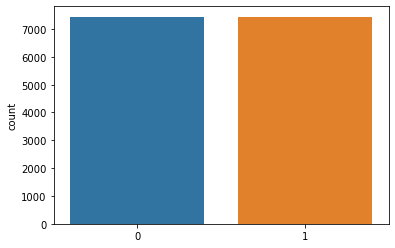

In [37]:
#-----------------------------------------
print("---HYPERPARAMETER TUNED TFIDF ---")
#JUST USE THIS AND INSERT BEST VALUE, no need to run hyperopt everytime
# first time, the hyperparameter tuned is better.

#HYPER PARAMETER TUNED, be sure to insert the values after finding best parameter
classifierTunedVect = svm.SVC(kernel='linear' ,random_state=0)

#Step 1 : Split train test
#Step 2 : Tf-idf
word_Smote_vec, sentiment_Smote_vec, word_test_vec , sentiment_test_vec, vecWord , vecSentiment , vectSMOTETFIDF = trainingSmoteVectorizerTUNED(fileName)

#Step 3: Fit into classifier
classifier(word_Smote_vec, sentiment_Smote_vec,classifierTunedVect)

#Step 4: Display result
displayResult(vecWord, vecSentiment, sentiment_test_vec,word_Smote_vec,word_test_vec,sentiment_Smote_vec,classifierTunedVect)

In [98]:
featureNames = np.array(vectSMOTETFIDF.get_feature_names())

def argsort(seq):
    # http://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python
    return sorted(range(len(seq)), key=seq.__getitem__)

print(featureNames)
#sorted_coef_index = defModel.coef_[0].argsort()

['aa' 'aaa' 'aaaa' ... 'zuado' 'zulu' 'zurck']


<t>USING THE PREDICTION MODEL</t>

In [48]:
gameName = "SMC"

In [49]:
file = "Preprocessed"+ gameName + "v3.xls"

In [50]:
#Use the prediction model
#https://stackoverflow.com/questions/66207282/how-can-i-make-sentiment-analysis-with-new-sentence-on-trained-model

#------------------------------------------------

#STEP 1:everytime we want to use model, need to transform reviews

#Will not be using the sentiment
reviews , sentiment = readFile(file)

#tfidf here, andclassifier depends on the model we chose

transformedReviews = vectSMOTETFIDF.transform(reviews)

#------------------------------------------------
#STEP 2: Feed into classifier
predictedValues = classifierTunedVect.predict(transformedReviews)



In [29]:
gameName = "Stellaris"

In [51]:
#STEP 3: INSERT the predicted values back into a new excel file

#IMPORT DATA FROM EXCEL---------------------------   

#insret data in excel
#https://www.geeksforgeeks.org/writing-excel-sheet-using-python/
import xlwt
from xlwt import Workbook
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1') #, cell_overwrite_ok=True)

df = pd.read_excel('Preprocessed'+ gameName + 'v3.xls')  


sheet1.write(0, 0, "score")
sheet1.write(0, 1, "sentiment")
sheet1.write(0, 2, "time")

for i in range (len(df)):

    score = df['score'][i]

    polarity = predictedValues[i]
    if polarity == 1:
        polarity = "TRUE"
    else:
        polarity = "FALSE"

    time = df['time'][i]

    sheet1.write(i+1, 0, score)
    sheet1.write(i+1, 1, polarity)
    sheet1.write(i+1, 2, int(time))


wb.save('Predicted'+ gameName + 'v3.xls') 
#print("Test Score:" ,random_result.score(word_test,sentiment_test))

#why find both accuracy? to avoid overfit, so we compare
#print(classification_report(sentiment_test, word_Testprediction))

#print("Actual:\t\t\t\t\t\t" , sentimentValues)
#print("Test Prediction :\t\t\t" , word_Testprediction)
#print("Train Prediction :\t\t\t" , word_Trainprediction)
#print(" Whole predicted values :\t" , classifier.predict(wordCount))

<t>Compare predicted and preprocessed true/false value</t>

In [55]:
def comparePredicted(predFile,preFile):
    dfPred = pd.read_excel(predFile)
    dfPre  = pd.read_excel(preFile)
        #xls = pd.ExcelFile("Preprocessed"+gameName+".xls")
        #df.info()
    print(sns.countplot(dfPred['sentiment']))
    print(sns.countplot(dfPre['sentiment']))    

    sentValPred = Counter(dfPred['sentiment'])
    sentValPre = Counter(dfPre['sentiment'])

    sentPred = sentValPred.most_common()
    numTruePred = sentPred[0][1] #get number of true sentiment
    numFalsePred = sentPred[1][1] #get number of false sentiment]

    sentPre = sentValPre.most_common()
    numTruePre = sentPre[0][1] #get number of true sentiment
    numFalsePre = sentPre[1][1] #get number of false sentiment

    print("True predicted" , numTruePred)
    print("False predicted" , numFalsePred)

    print("True preprocess" , numTruePre)
    print("False preprocess" , numFalsePre)

In [62]:
name = "Stellaris"

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
True predicted 12532
False predicted 1506
True preprocess 12798
False preprocess 1240


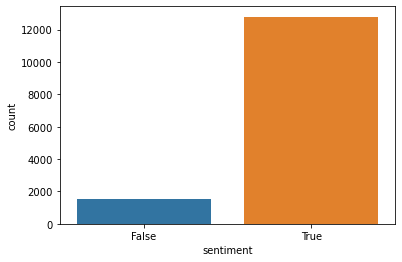

In [63]:
comparePredicted("Predicted"+name+"v3.xls", "Preprocessed"+name+"v3.xls")

In [72]:
gameName = "Stellaris"

In [71]:
#must use the prediction model first.
#ALGORITHM TO CALCULATE SENTIMENT SCORE FOR EACH DAY AND SAVE TO EXCEL FOR EACH GAME , create module

# import datetime module
#https://www.javatpoint.com/python-epoch-to-datetime
import datetime

#IMPORT DATA FROM EXCEL---------------------------   
#https://www.geeksforgeeks.org/how-to-iterate-through-excel-rows-in-python/
import openpyxl
from sqlalchemy import null

#insret data in excel
#https://www.geeksforgeeks.org/writing-excel-sheet-using-python/
import xlwt
from xlwt import Workbook
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1') #, cell_overwrite_ok=True)

import math
import pandas as pd

#header_labels = ('test1','test2')

#insert header
#for indx,val in enumerate(header_labels):
 #   ws.Cells(1, indx+1).Value = val

#*********LOCATION OF SENTIMENT DATASET ----------------------
# load excel with its path
#wrkbk = openpyxl.load_workbook("PreprocessedBloonsTD.xls")

def calcScore(fileName,saveName):
    #df = pd.read_excel("Predicted" + gameName + "v3.xls")  
    #df = pd.read_excel("Preprocessed" + gameName + ".xls")  
    df = pd.read_excel(fileName)  

    # iterate through excel 

    #get time
    cell_obj = (df['time'][0])  #col  2 to get epoch, row 2 to get the very first data
    epoch_time =  cell_obj
    datetime_obj = datetime.datetime.fromtimestamp( epoch_time )  
    
    # using the strftime() function  
    datetime_str = datetime_obj.strftime( "%d" )  #get day only
    datetime_int =  int(datetime_str)
    currMonth = int(datetime_obj.strftime( "%m" ))

    #for next month to compare currMonth and nextMonth
    cell_objNext = (df['time'][1]) #i+1 because 
    datetime_objNext = datetime.datetime.fromtimestamp( cell_objNext )  
                
                # get the next date
    nextMonth = int(datetime_objNext.strftime( "%m" ))

    #STILL NEED TO CODING TO LOOP THROUGH 12 MONTHS
    #STILL NEED TO TRANSFER POLARITY (SA POLARITY, NOT RECOMMENDATION POLARITY)

    y = 0 #for new row when reaching a different day 
    score = 0
    sumPositive = 0
    sumNegative = 0

    sheet1.write(0, 0, "date")
    #sheet1.write(0, 1, "player") #just to see if it ends at the correct place
    sheet1.write(0, 1, "score")

    df['time_s'] = df['time'].shift(-1)

    days = 31 #initial number of days for december, 
    for i in range(len(df)): #START FROM ROW 2

                #change month so x does not go to negative
                if currMonth != nextMonth:
                    if nextMonth == 2: #for feb
                        days = 29 

                    if nextMonth in [1,3,5,7,8,10,12]: 
                        days = 31 
                    if nextMonth in [4,6,9,11]:
                        days = 30 

                #check date days if theyre changing, CALCULATE SCORE:
                if days == datetime_int:
                #  polarity = (df['polarity'][i])
                    polarity = (df['sentiment'][i])    

                    if polarity == True:
                        sumPositive += (df['score'][i])
                    #    sumPositive =  sumPositive + 1 + (df['score'][i])  
                #     sumPositive =  sumPositive + 1
                    else:
                        sumNegative += (df['score'][i]) 
                    #    sumNegative =  sumNegative + 1 + (df['score'][i]) 
                    #    sumNegative =  sumNegative + 1 
                else:
                    sumPositive = 0
                    sumNegative = 0  

                #   polarity =  (df['polarity'][i])  
                    polarity = (df['sentiment'][i])  

                    if polarity == True:
                        sumPositive += (df['score'][i])
                    #    sumPositive =  sumPositive + 1 + (df['score'][i])  
                    #    sumPositive =  sumPositive + 1
                    else:
                        sumNegative += (df['score'][i]) 
                    #    sumNegative =  sumNegative + 1 + (df['score'][i]) 
                    #   sumNegative =  sumNegative + 1 
                        
                
                epoch_time =  (df['time'][i])

                #CONVERTS FROM EPOCH TO DATETIME
                #datetime.datetime.fromtimestamp( epoch_time )
                datetime_obj = datetime.datetime.fromtimestamp( epoch_time )

                # using the strftime() function  
                currMonth = int(datetime_obj.strftime( "%m" ))

                datetime_str = datetime_obj.strftime( "%d" )  # %d get day only
                datetime_int =  int(datetime_str)

                #check if next row exist or not
                if not(math.isnan(df['time_s'][i])):
                    cell_objNext = (df['time_s'][i]) #i+1 because 
                    

                datetime_objNext = datetime.datetime.fromtimestamp( cell_objNext )  
                
                # get the next date
                nextMonth = int(datetime_objNext.strftime( "%m" ))

                datetime_strNext  = datetime_objNext.strftime( "%d" )  #get day only
                datetime_intNext  =  int(datetime_strNext)

                date = datetime_obj.strftime("%Y-%m-%d")

                if datetime_int != datetime_intNext: #to insert row when it reaches the final day, so it will not overwrite same days

                    
                    #score is here, because only when days changed, it can sum everything
                    # score = math.log10((sumPositive/sumNegative)) #column 3 to get score for each row #formula according to LR a bit
                    score = math.log10((1+sumPositive/1+sumNegative))
                #  score = (1+sumPositive)/(1+sumNegative)
                #  score = sumPositive - sumNegative
                    sheet1.write(y+1, 0, date)
                    sheet1.write(y+1, 1, score)

                #   print("---------------------")
                #    print(sumPositive)
                #    print(sumNegative)
                #    print(score)
                    y += 1 #update when day finally changes


                #usually, it will not insert the final row, so this to detect if next is empty, it will still insert.
                if math.isnan(df['time_s'][i]):

                    score = math.log10((1+sumPositive/1+sumNegative))
                #  score = (1+sumPositive)/(1+sumNegative)
                #  score = sumPositive - sumNegative
                    sheet1.write(y+1, 0, date)
                    sheet1.write(y+1, 1, score)

    #try to make score finding difference from previous day. 
                    
                if datetime_int != datetime_intNext:
                    days -= 1 

    wb.save(saveName)    #directory to save
    #wb.save('sentScoreTest3'+ gameName + '.xls')

In [64]:
#ALGORITHM TO CONSOLIDATE PEAK PLAYER AND  SENTIMENT SCORE

import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import xlwt
from xlwt import Workbook
from datetime import datetime

def consolidate(sentiment,playerbase):
    
    wb = Workbook()
    
    sheet1 = wb.add_sheet('Sheet 1')
    sheet1.write(0, 0, "sentscore")
    sheet1.write(0, 1, "peakplayer")
    sheet1.write(0, 2, "datetime")

    excelRow = 0
    doc = 0

    dfSentiment = pd.ExcelFile(sentiment).parse() #xls
    dfPlayer = pd.read_csv(playerbase) #csv
    
    for i in range(len(dfSentiment)): 

    #-----------GET REVIEW ------------
            dateSent = str(dfSentiment['date'][i])
            yearS = dateSent[0:4]
            monthS = dateSent[5:7]
            dayS = dateSent[8:10]    
            dateSent = dayS + monthS + yearS 
            for j in range(len(dfPlayer)):
            
                datePlay = str(dfPlayer['DateTime'][j])
                
                yearP = datePlay[0:4]
                monthP = datePlay[5:7]
                dayP = datePlay[8:10]  
                datePlay = dayP + monthP + yearP 

                if dateSent == datePlay:  #need to conver the date into somehting both are the same

                    numPlayer = (dfPlayer['Players'][j])
                    sentScore = (dfSentiment['score'][i])
                    sheet1.write(excelRow+1, 0, float(sentScore))
                    sheet1.write(excelRow+1, 1, int(numPlayer))
                   # sheet1.write(excelRow+1, 2,  dayP + "/" + monthP + "/" + yearP )
                   #sheet1.write(excelRow+1, 2,  dayP + "-" + monthP + "-" + yearP )
                    sheet1.write(excelRow+1, 2,  yearP + "-" + monthP + "-" + dayP )
                    excelRow += 1

    wb.save("consolidated" + gameName + "-NotPredicted.xls")  

In [76]:
gameName = "BloonsTD"
fileName = gameName + "-NotPredicted.xls"

In [72]:

saveName = "sentScore" + gameName + "-NotPredicted.xls"
calcScore(fileName,saveName)

In [73]:
#CALL consolidate
#sentiment = "sentScore" + gameName + ".xls" #eg, sentScoreBloonsTD
#player = "player" + gameName + ".csv" #eg, playerBloonsTD
sentiment = saveName
player = "chart" + gameName + ".csv"
consolidate(sentiment,player)

In [80]:
#must use the prediction model first.
#ALGORITHM TO CALCULATE SENTIMENT SCORE FOR EACH DAY AND SAVE TO EXCEL FOR EACH GAME , create module

# import datetime module
#https://www.javatpoint.com/python-epoch-to-datetime
import datetime

#IMPORT DATA FROM EXCEL---------------------------   
#https://www.geeksforgeeks.org/how-to-iterate-through-excel-rows-in-python/
import openpyxl
from sqlalchemy import null

#insret data in excel
#https://www.geeksforgeeks.org/writing-excel-sheet-using-python/
import xlwt
from xlwt import Workbook
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1') #, cell_overwrite_ok=True)

import math
import pandas as pd

#header_labels = ('test1','test2')

#insert header
#for indx,val in enumerate(header_labels):
 #   ws.Cells(1, indx+1).Value = val

#*********LOCATION OF SENTIMENT DATASET ----------------------
# load excel with its path
#wrkbk = openpyxl.load_workbook("PreprocessedBloonsTD.xls")




def countTF(fileName):
    #df = pd.read_excel("Predicted" + gameName + "v3.xls")  
    #df = pd.read_excel("Preprocessed" + gameName + ".xls")  
    df = pd.read_excel(fileName)  
    countPos = 0
    countNeg = 0
    # iterate through excel 

    for i in range(len(df)): #START FROM ROW 2

                polarity = (df['sentiment'][i]) 

                if polarity == True:   
                    if df['score'][i] != 0:
                        countPos += 1
                else:
                    if df['score'][i] != 0:
                        countNeg += 1 

    print("Positive counted:" , countPos)
    print("Negative counted:", countNeg)
    #wb.save('sentScoreTest3'+ gameName + '.xls')

In [84]:
gameName = "Stellaris"
fileName = gameName + "-NotPredicted.xls"
countTF(fileName)

Positive counted: 3258
Negative counted: 885
